# Project Foundations for Data Science: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [151]:
# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [150]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Understanding the structure of the data

In [60]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [152]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [153]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
Data Frame has 1898 rows and 9 columns. 

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [63]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Categorical Columns: restaurant_name, cuisine_type, day_of_the_week and rating. 
Numerical Columns(int): order_id, customer_id, food_preparation_time, delivery_time
Numerical Columns(float):cost_of_the_order

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [64]:
# Write your code here
df.isnull().sum()

# OR 
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
We observe that we do not have missing values for any columns. 

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [100]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [102]:
df.describe(exclude= "number")

,restaurant_name,cuisine_type,day_of_the_week,rating
count,1898,1898,1898,1898
unique,178,14,2,4
top,Shake Shack,American,Weekend,Not given
freq,219,584,1351,736


#### Observations:
We can see the statistical summary for numerical columns.
- Average cost of order is 16.50$
- Average food prepartion time is 27.37 mins. 
- Average delivery time is 24.16 mins. 
- There are 4 unique ratings, and NOT GIVEN has most freq (736)
- Most visited restaurnat is Shake Shack 
- Most ordered cuisine is American 
- We get more orders on Weekends, then on weekdays. 

### **Question 5:** How many orders are not rated?

In [66]:
# Write the code here
df.rating.value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations:
We see that 736 orders are not rated. 

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

#### Order ID

In [67]:
df.order_id.nunique()

1898

#### Observations:
Number of unique order id is same as total number of rows in data, which makes sense, as order_id is the unique identifier.
Hence even though we have a numerical data,but cannot be distributed in the traditional sense, not appropriate to be treated as a continous variable. 


#### Customer ID 

In [68]:
df.customer_id.nunique()

1200

#### Observations: 
We have 1200 unique customers, since we have 1898 rows in our dataframe, it safe to say we have some repeating customers.

#### Restaurant name

In [70]:
df.restaurant_name.value_counts().sort_values(ascending=False)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Coppola's East                 1
Kori Restaurant and Bar        1
Woorijip                       1
Crema Restaurante              1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

#### Observations:
Most visited restuarant is Shake Shack with frequency 219.

#### Cuisine Type

In [71]:
df.cuisine_type.value_counts().sort_values(ascending=False)

cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64

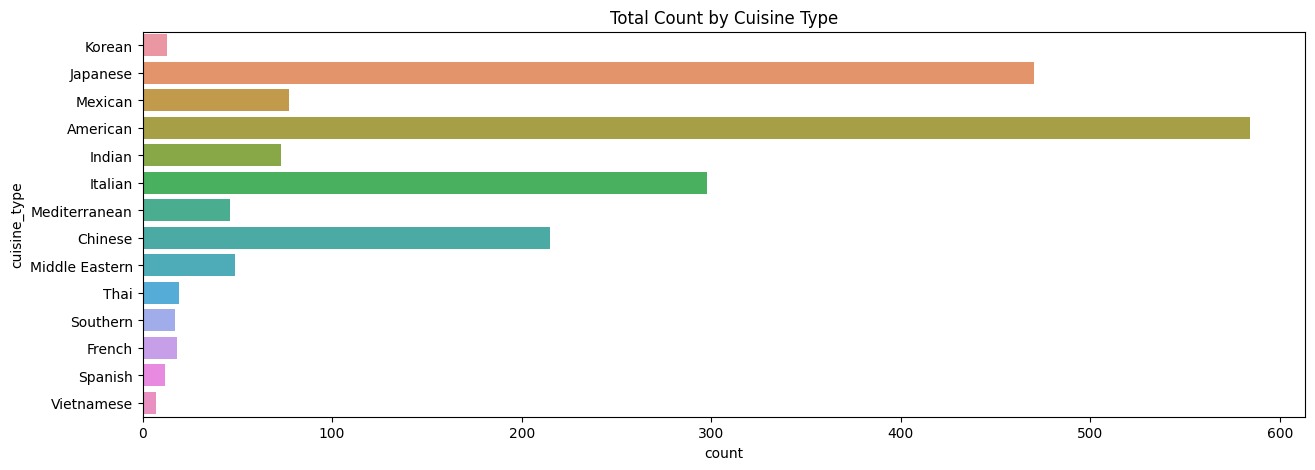

In [203]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, y = 'cuisine_type') ## Create a countplot for cuisine type.
# Adding title
plt.title('Total Count by Cuisine Type')
plt.show()

#### Observation: 
Most ordered cuisine is American, followed by Japanese. Which makes sense as most visited restaurant is Shake Shack and they offer American cuisine. 

#### Cost Of Order

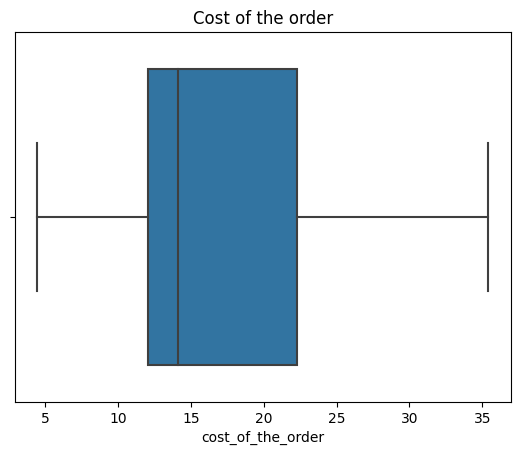

In [204]:
sns.boxplot(data=df,x='cost_of_the_order')
# Adding title
plt.title('Cost of the order')
plt.show()

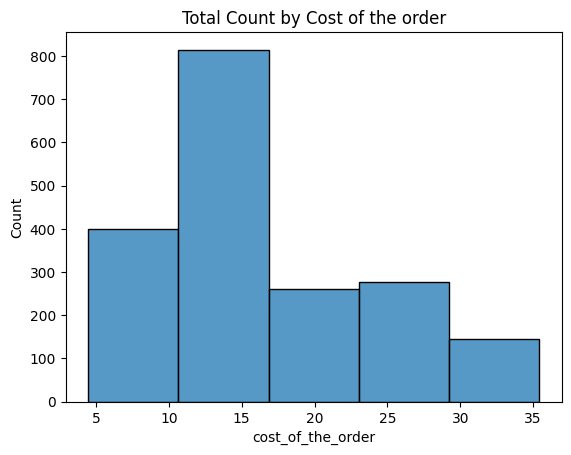

In [205]:
sns.histplot(data=df,x='cost_of_the_order', bins= 5)
# Adding title
plt.title('Total Count by Cost of the order')
plt.show()

#### Observation:
We know cost of order is a continous variable, so we begin by checking the boxplot (to check for outlier, see the skew of the data.)
We see have a right skewed data, and dont have outliers.
We can confirm same with histogram. Moreover, we can see that majority of cost of the order between 11$ to 16$.

#### Day of the Week

In [87]:
df.day_of_the_week.value_counts()

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64

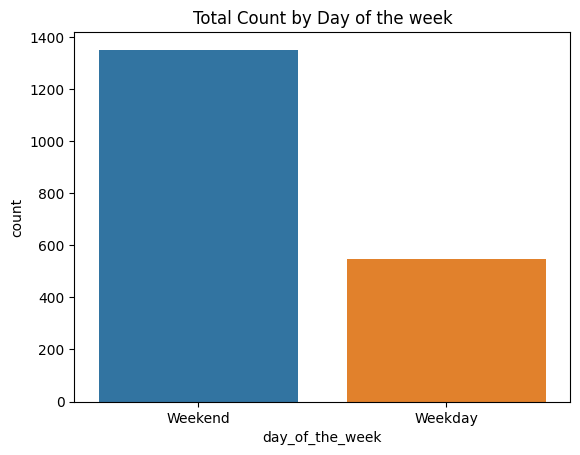

In [206]:
sns.countplot(df, x= 'day_of_the_week')
# Adding title
plt.title('Total Count by Day of the week')
plt.show()

In [89]:
# Calculate percentage of order for day of the week. 

df.day_of_the_week.value_counts(normalize=True)

day_of_the_week
Weekend    0.711802
Weekday    0.288198
Name: proportion, dtype: float64

#### Observation:
We can see that number of order on weekend is much higher than then that on the weekend. Moreover, if we want to see split, we can see order on weekend is about 71.2% of our dataset. 

#### Rating:

In [91]:
df.rating.value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

In [90]:
df.rating.value_counts(normalize=True)

rating
Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: proportion, dtype: float64

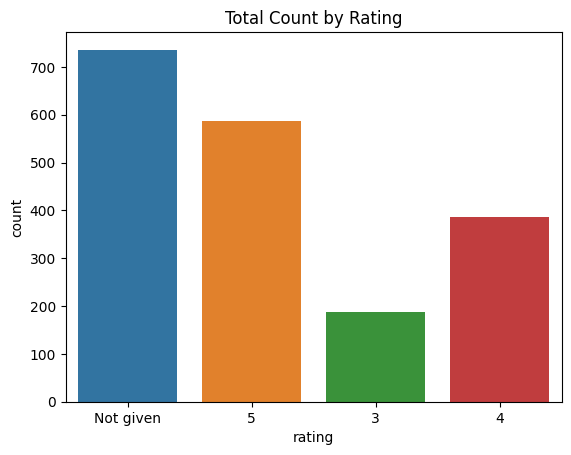

In [207]:
sns.countplot(df, x= 'rating')
# Adding title
plt.title('Total Count by Rating')
plt.show()

#### Observation: 
We observe that NOT GIVEN makes about 38.78%, 5-> 30.98%, 4-> 20.38$% 3-> 9.91% and we dont have any rating below 3.

#### Food Preparation Time

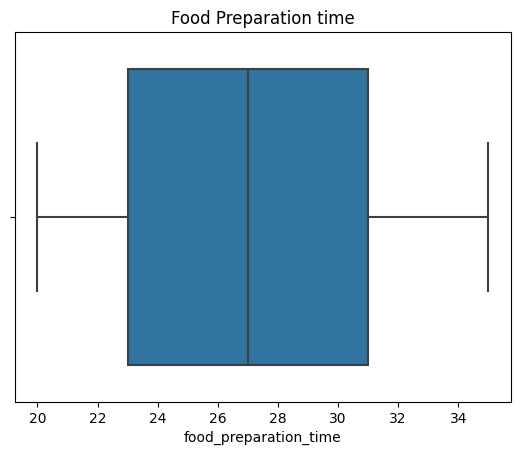

In [208]:
sns.boxplot(df,x='food_preparation_time')
# Adding title
plt.title('Food Preparation time')
plt.show()

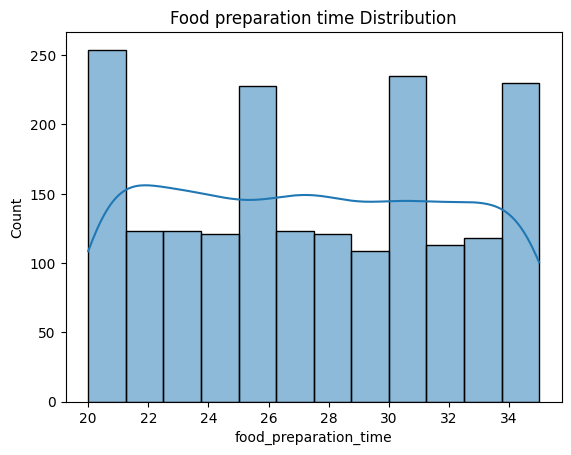

In [213]:
sns.histplot(df, x='food_preparation_time', kde= True);
# Adding title
plt.title('Food preparation time Distribution')
plt.show()

#### Observations:
We see that for food prep time, mean and median are pretty close to each other. And histogram looks bimodal but if we reduce bin, I think it look more like normal distribution.

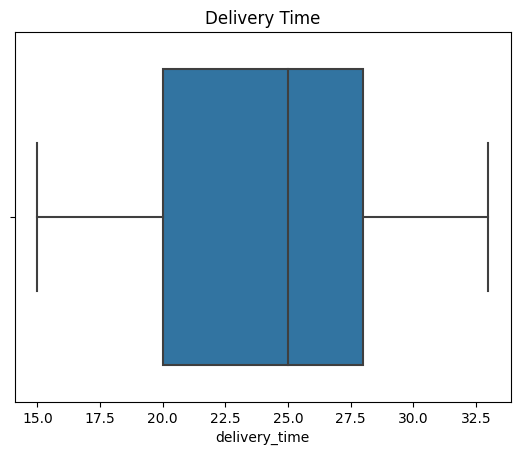

In [210]:
sns.boxplot(df, x= 'delivery_time')
# Adding title
plt.title('Delivery Time')
plt.show()

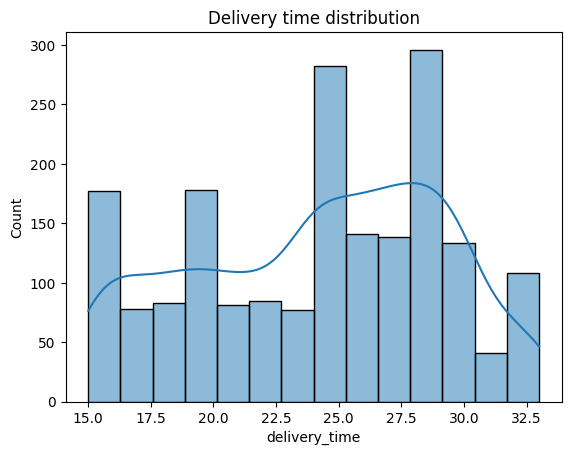

In [212]:
sns.histplot(df, x='delivery_time', kde= True)
# Adding title
plt.title('Delivery time distribution')
plt.show()

#### Observations:
Delivery time looks skewed to the left and we dont see any outliers. Histgram of delivery time looks bimodal. 

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [107]:
df.restaurant_name.value_counts().sort_values(ascending=False).head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:
Top 5 restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm

### **Question 8**: Which is the most popular cuisine on weekends?

In [121]:
cuisine_weekend_value_counts= df.cuisine_type[df['day_of_the_week']=='Weekend'].value_counts().sort_values(ascending= False)
print("Most famous cuisine on weekends:",cuisine_weekend_value_counts.idxmax())
print("Count:", cuisine_weekend_value_counts.max())

Most famous cuisine Type on weekends: American
Count: 415


#### Observations:
Most famous cuisine is American. 

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [142]:
# Write the code here
cost_greater_than_20=df.cost_of_the_order[df['cost_of_the_order']>20]
num_orders_greater_than_20 = len(cost_greater_than_20)
total_num_orders= len(df)
percentage= (num_orders_greater_than_20/total_num_orders)*100
print(f"Number of orders cost more than 20$: {num_orders_greater_than_20} \nTotal number of Orders: {total_num_orders}\nPercentage of the orders costing more than 20$: {percentage:.2f}%")

Number of orders cost more than 20$: 555 
Total number of Orders: 1898
Percentage of the orders costing more than 20$: 29.24%


#### Observations:
Percentage of orders cost more than 20$ is 29.24%

### **Question 10**: What is the mean order delivery time?

In [145]:
# Write the code here
round(df.delivery_time.mean(), 2)

24.16

#### Observations:
Mean delivery time is 24.16 mins.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [147]:
# Write the code here
df.customer_id.value_counts().head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:
Top 3 customers to qualify for 20% discount vouchers are customer_id: 52832, 47440, 83287

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

#### Cuisine vs Cost of the order

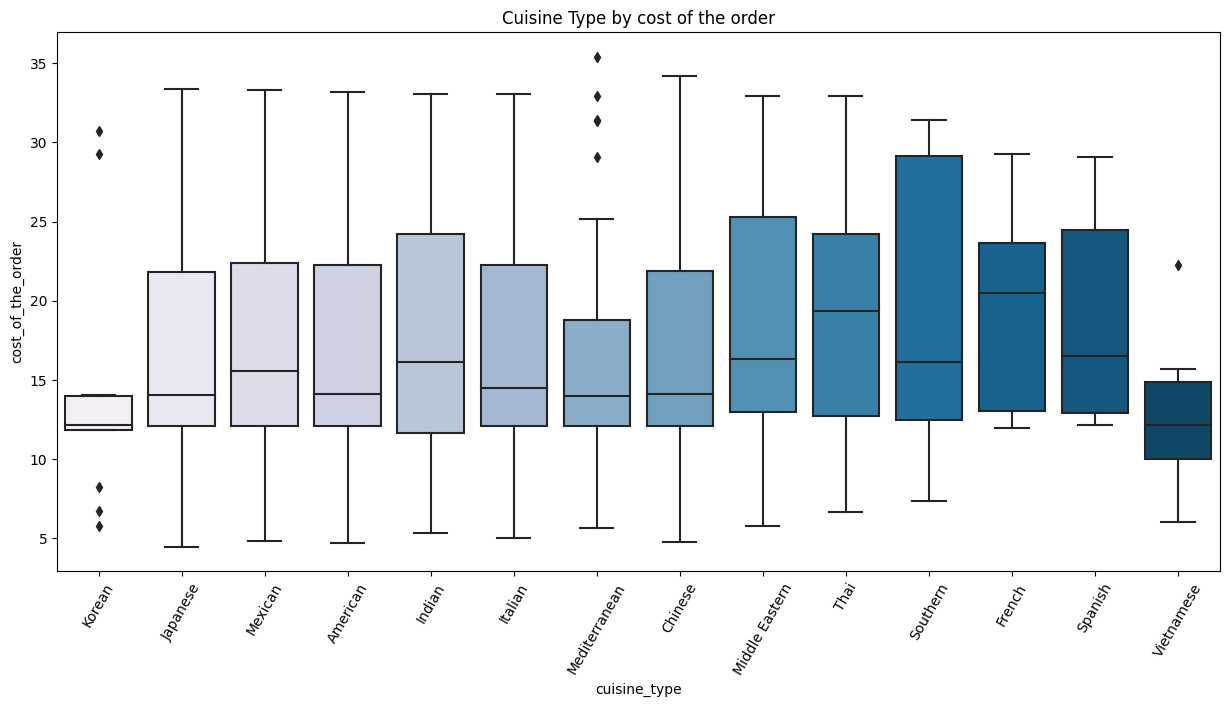

In [214]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.title('Cuisine Type by cost of the order')
plt.show()
plt.show()

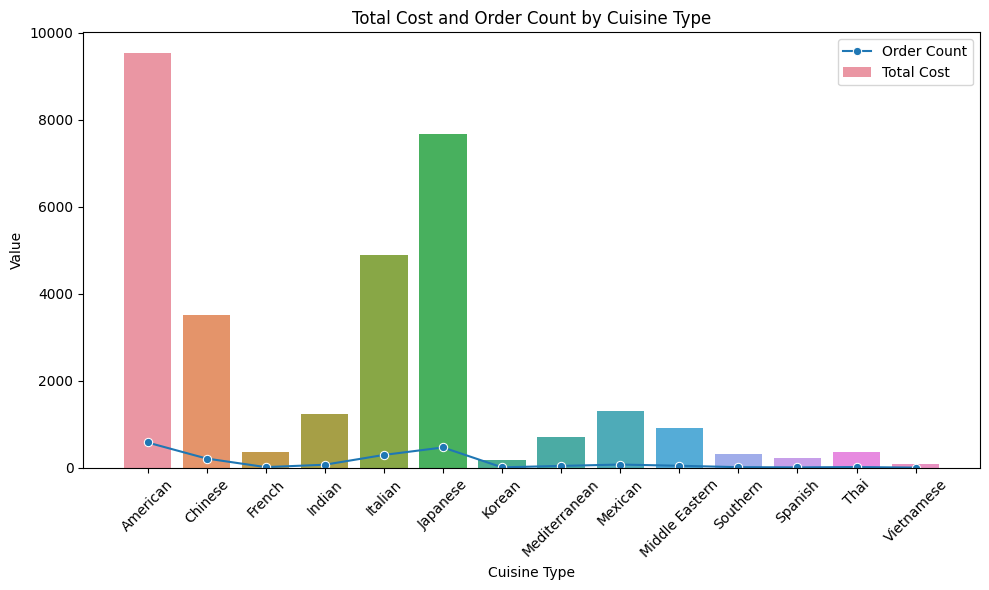

In [178]:
sum_cost_by_cuisine = df.groupby('cuisine_type')['cost_of_the_order'].sum()
average_cost_by_cuisine= df.groupby('cuisine_type')['cost_of_the_order'].mean()
count_by_cuisine = df.groupby('cuisine_type')['cost_of_the_order'].count()
# Plotting
plt.figure(figsize=(10, 6))

# Plotting total cost
sns.barplot(x=sum_cost_by_cuisine.index, y=sum_cost_by_cuisine.values,label='Total Cost')

# Plotting count
sns.lineplot(x=count_by_cuisine.index, y=count_by_cuisine.values, marker='o', label='Order Count')

# Adding labels and title
plt.xlabel('Cuisine Type')
plt.ylabel('Value')
plt.title('Total Cost and Order Count by Cuisine Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

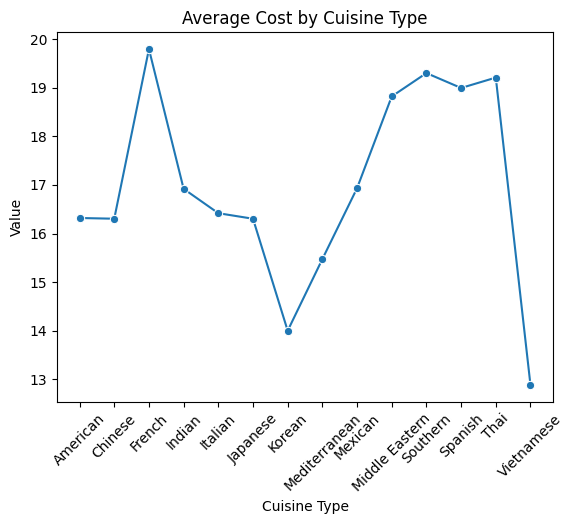

In [185]:

sns.lineplot(x=average_cost_by_cuisine.index, y= average_cost_by_cuisine, marker= 'o')
plt.xlabel('Cuisine Type')
plt.ylabel('Value')
plt.title('Average Cost by Cuisine Type')
plt.xticks(rotation=45)
plt.show()

#### Observation: 
- We observe outliers are Mediterranean, Korean and Vietnamese food. 
- We observe Korean and Southern cuisine are strongly skewed to the right. 


#### Cuisine vs Food Preparation time

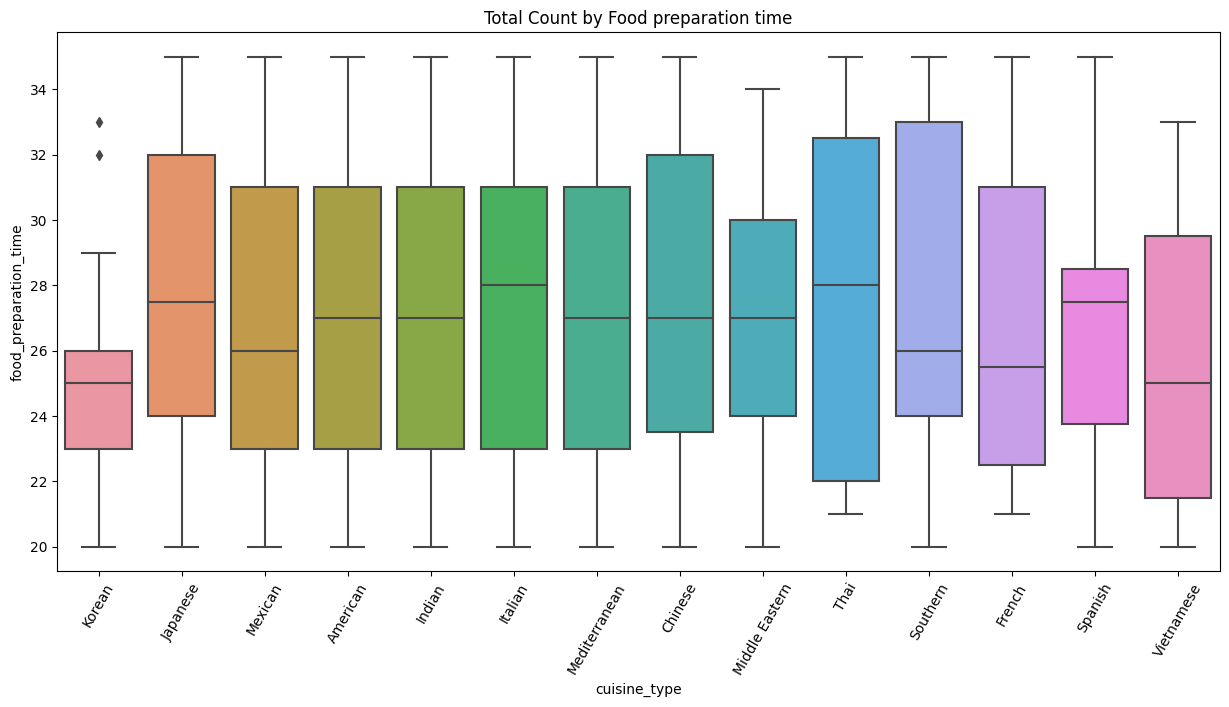

In [215]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x= 'cuisine_type', y= 'food_preparation_time')  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
# Adding title
plt.title('Total Count by Food preparation time')
plt.show()

#### Observation: 
- Food preparation is lowest for Korean, not considering outliers. 


#### Day of the Week vs Delivery time

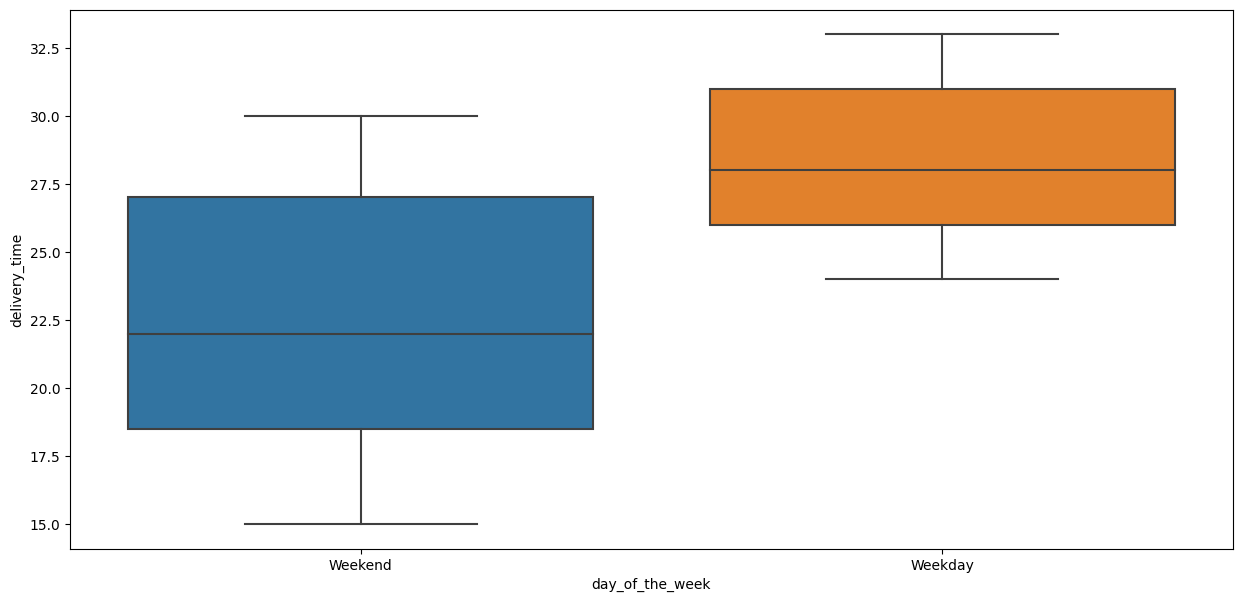

In [216]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x= 'day_of_the_week', y= 'delivery_time')
# Adding title
plt.title('Day of the week vs Delivery time')
plt.show()

#### Observation: 
- Mean delivery time on Weekend is around 22 mins. 
- Mean delivery time on Weekdays is around 28 mins. 

#### Rating vs Delivery time

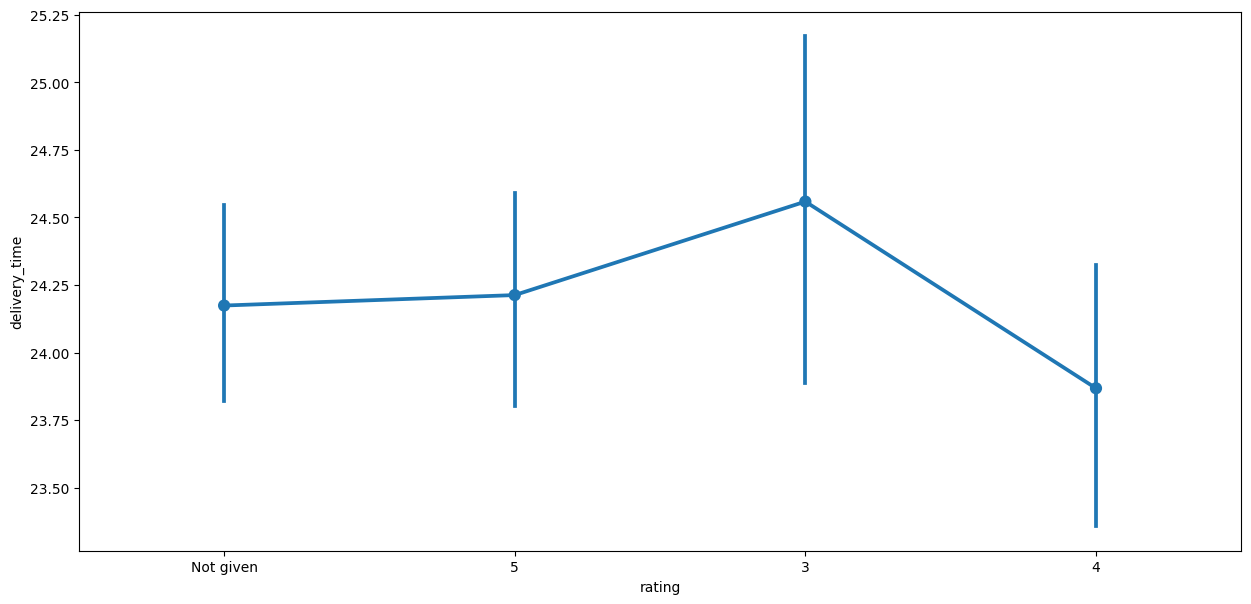

In [219]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.title('Rating vs Delivery time')
plt.show()

#### Rating vs Food preparation time

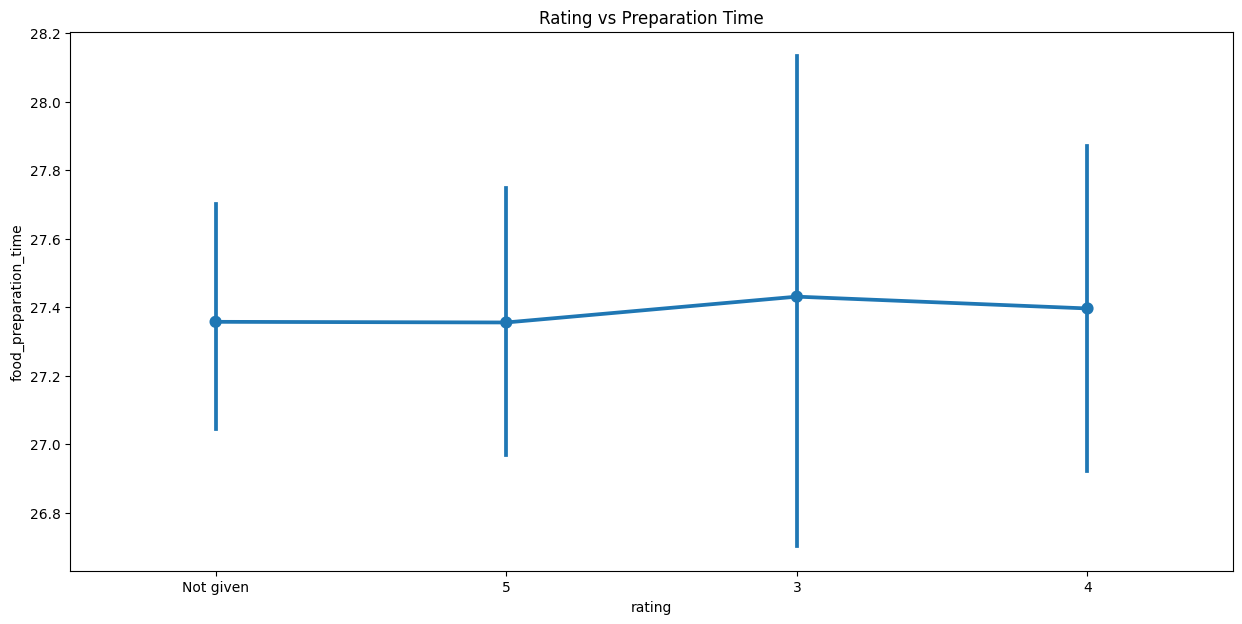

In [221]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(data= df, x='rating', y='food_preparation_time')
plt.title('Rating vs Preparation Time')
plt.show()

#### Rating vs Cost of the order

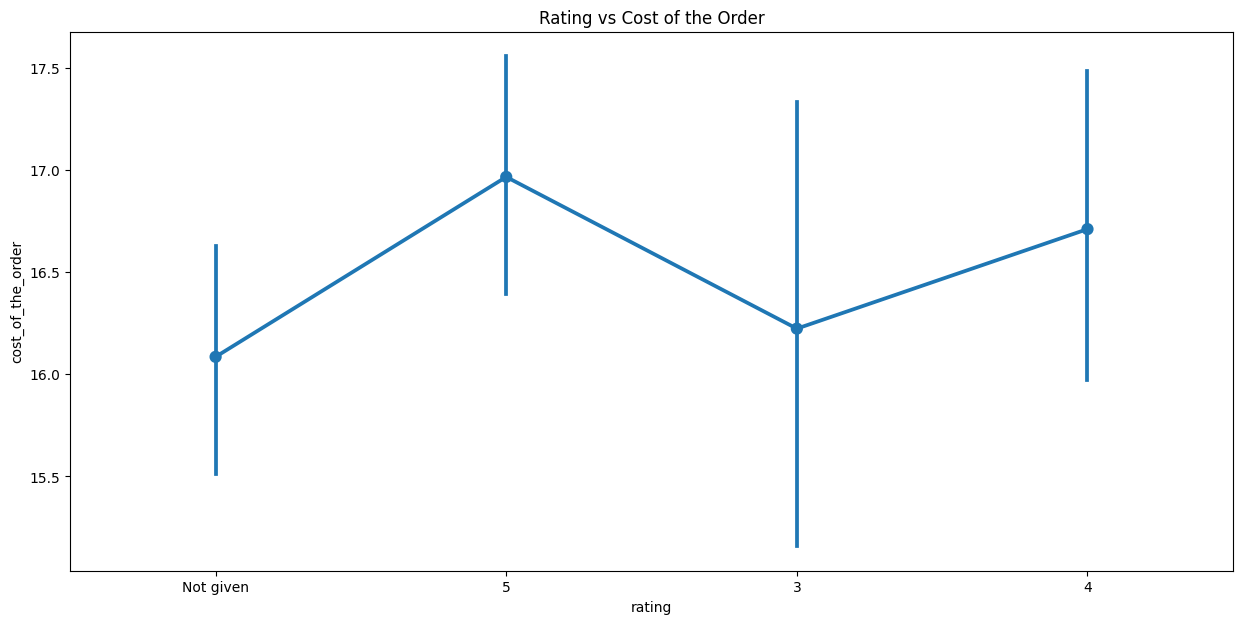

In [218]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(data= df, x='rating', y='cost_of_the_order')
plt.title('Rating vs Cost of the Order')
plt.show()

#### Correlation among variables

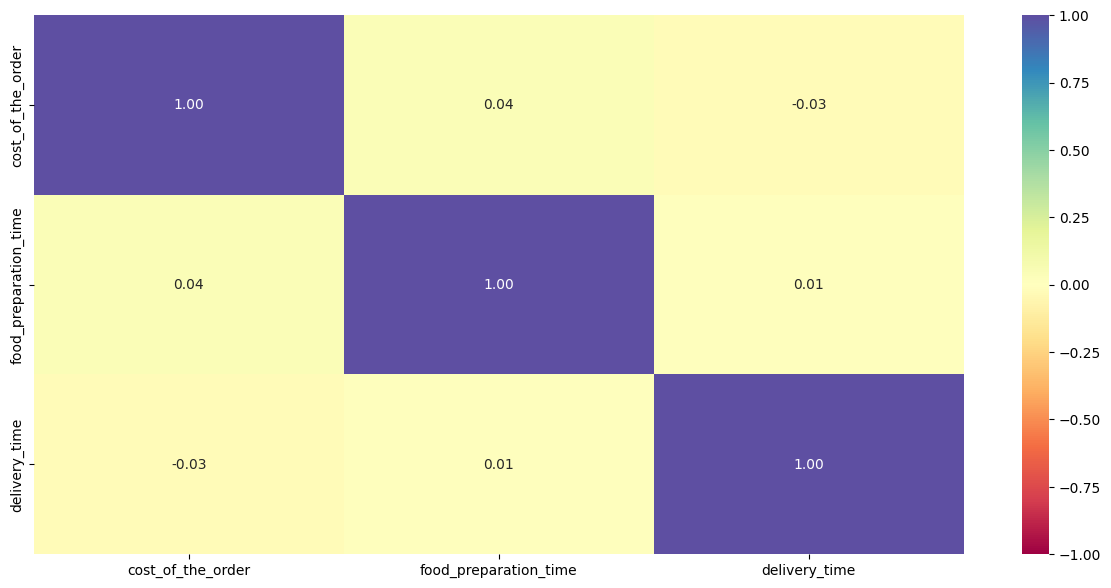

In [217]:
# Plot the heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observation: 
- We observed negative corelation between delivery_time and cost_of_the_order.
- We positive corelation between food_prepation_time and cost_of_the order and food_prepation_time and delivery_time

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [187]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')  

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head() 


,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [193]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name'] ## Complete the code to get the restaurant names having rating count more than 50

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating


,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:
There are 4 restaurant that has more than 50 rating counts, and average rating greater than 4. 
The Meatball Shop has highest rating.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [194]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Write the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [195]:
# get the total revenue and print it
total_rev = df['Revenue'].sum() ## Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observations:
Company generated 6166.3 $ in net revenue.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [198]:
df['total_time']= df.food_preparation_time + df.delivery_time
round(len(df[df.total_time>60])/len(df)*100,1)

10.5

#### Observations:
About 10.5 % of time orders takes more than 60 min to get delivered from the time order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [201]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')
print('The mean delivery time on weekends is around', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

## Write the code below to get the mean delivery time on weekends and print it

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


#### Observations:
Its take on average 6 min longer on weekdays then on weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  A notable observation is that the majority of FoodHub orders were placed during the weekend, indicating a potential peak in demand during this period.
* Regarding ratings, it's noteworthy that a significant portion of orders were not rated, while the rest received ratings primarily in the range of 3 to 5. This underscores the importance of soliciting feedback from customers to gain insights into their satisfaction levels and areas for improvement.
* The data indicates that SHAKE SHACK emerges as the most popular restaurant among FoodHub customers, while AMERICAN cuisine ranks as the most preferred choice.


### Recommendations:

*  For customers with a history of ordering less than three times, it's essential to proactively engage with them to understand their experiences and potential barriers to ordering more frequently. 
* Offering incentives for feedback and incorporating post-order feedback mechanisms could be effective strategies.
* To capitalize on customers who place orders more frequently, strategies aimed at increasing their spending should be considered. 
* This could involve introducing additional menu items or creating special offers to encourage upselling.
To address any issues related to food or packaging quality, it's crucial to gather more detailed feedback from customers. 
* Restaurants should be informed of any identified issues and encouraged to take corrective actions to improve their practices and maintain customer satisfaction.

---